In [3]:
import PIL.Image
img = PIL.Image.open('./tmp/SemCity/img_multispec_05/TLS_BDSD_RGB_noGeo/TLS_BDSD_RGB_noGeo_04.tif')
img.size

(3504, 3452)

In [5]:
import numpy as np
from matplotlib import pyplot as plt
def displayImg(img):
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(np.asarray(img))
    ax.set_axis_off()
    plt.show()

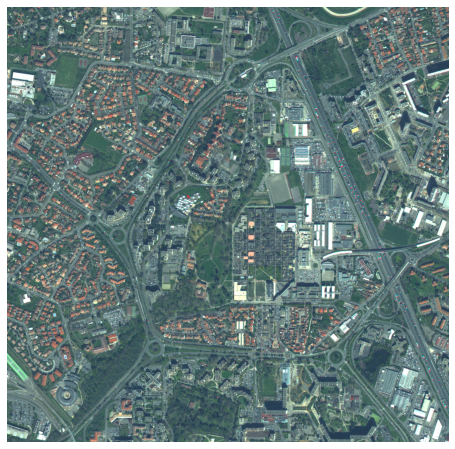

In [6]:
displayImg(img)

In [57]:
diff = [-30.993930024155432, -8.073696983449594, -3.587141932092152]
scalars = [0.7552235109441855, 0.9369371667672098, 0.9707491182064556]
img = PIL.Image.open('./tmp/Greenspace/Crop_50m/Another_Course_To_College.png')
x = np.array(img)
print(x.shape)
xs = []
for i in range(3):
    # x[:,:,i] = np.clip(x[:,:,i] + diff[i], 0, 256)
    x[:,:,i] = np.clip(x[:,:,i] * scalars[i], 0, 256)
x.astype(np.uint8)
print(x.shape)
PIL.Image.fromarray(x).save('./tmp/Greenspace/Crop_50m/Another_Course_To_College_process2.png')

(512, 512, 4)
(512, 512, 4)


In [32]:
import PIL.Image
import numpy as np
# origin
img = PIL.Image.open('./tmp/Greenspace/School_50m/Carter_Development_Center.png')
x = np.array(img).transpose(2, 0, 1)
x = x.astype(np.float64)
x[-1,:,:] = x[-1,:,:] / 255
stat = []
for k in range(3):
    layer = [0, 0]
    for i in range(x.shape[1]):
        for j in range(x.shape[2]):
            layer[0] += x[k,i,j] * x[-1,i,j]
            layer[1] += x[-1,i,j]
    stat.append(layer[0] / layer[1])
print(stat)
# new
img = PIL.Image.open('./tmp/Greenspace/Crop_50m/Carter School.png')
x = np.array(img).transpose(2, 0, 1)
stat_new = [x[i].mean() for i in range(3)]
print(stat_new)

[109.20914781100001, 101.31290017723417, 95.65117327871725]
[92.84841918945312, 96.9752197265625, 90.86003875732422]


In [14]:
img = PIL.Image.open('./tmp/Greenspace/School_50m/Carter_Development_Center.png')
x = np.array(img)
x[-1] = np.zeros(x.shape[1:], dtype=np.int8)
PIL.Image.fromarray(x).save('./Carter_Development_Center_test.png')